In [12]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

train_data = pd.read_csv("/home/tae-hyun-ueon/Documents/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
from sklearn.model_selection import train_test_split

# X = train_data[["Pclass"]]
features = ["Pclass", "Sex","SibSp", "Parch", "Fare"]
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)


In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42).fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [19]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score)

[[103  12]
 [ 20  44]]
Accuracy: 0.8212290502793296


The confusion matrix is a table how the classifier predictions compared to the true labels. 

The table works like 

|  | Pred 0 | Pred 1 |
| :--- | :--- | :--- |
| True 0 | TN | FP |
| True 1 | FN | TP |

Where TP is true positive (i.e. predicted 1 and it is 1)
TN is true negaitve (i.e. predicted 0 and it is 0)
FP is false positive (Predicted 1 but it is 0)
FN is false negative (Predicted 0 but is 1)

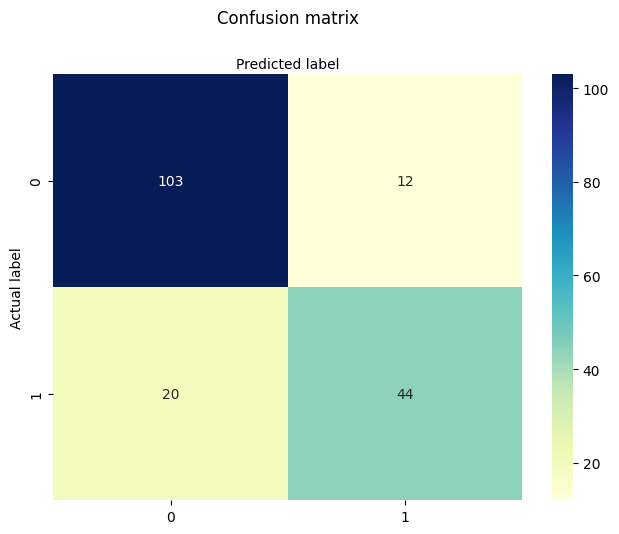

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()